1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
PATH = "/content/HomeWork-churn_rate_prediction.csv" 
df = pd.read_csv(PATH)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'days_since_last_login'}>],
       [<Axes: title={'center': 'avg_time_spent'}>,
        <Axes: title={'center': 'avg_transaction_value'}>],
       [<Axes: title={'center': 'points_in_wallet'}>,
        <Axes: title={'center': 'churn_risk_score'}>]], dtype=object)

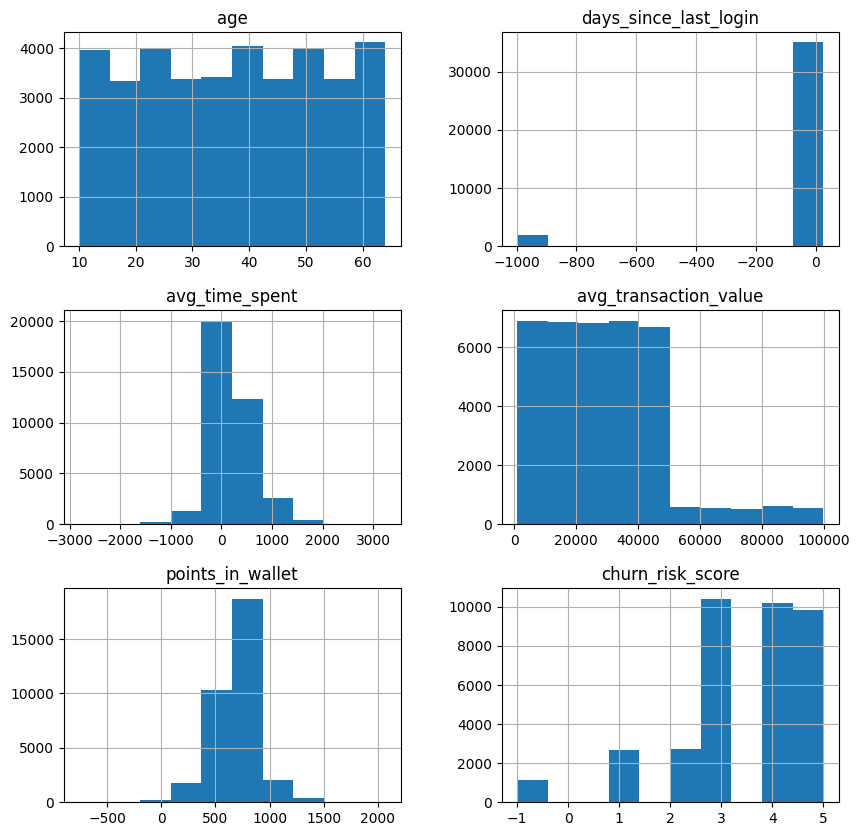

In [ ]:
df.hist(figsize=(10,10))

## Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [ ]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [ ]:
object_cols = [col for col in df.columns if df[col].dtype=='O']
for col in object_cols:
  print(col, df[col].nunique())

customer_id 36992
Name 36992
gender 3
security_no 36992
region_category 3
membership_category 6
joining_date 1096
joined_through_referral 3
referral_id 11359
preferred_offer_types 3
medium_of_operation 4
internet_option 3
last_visit_time 30101
avg_frequency_login_days 1654
used_special_discount 2
offer_application_preference 2
past_complaint 2
complaint_status 5
feedback 9


In [ ]:
non_categorical_features = [col for col in df.columns if df[col].dtype=='O' and df[col].nunique() > 9]
print(non_categorical_features)
categorical_features = [col for col in df.columns if df[col].dtype =='O' and col not in non_categorical_features]
print(categorical_features)

['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time', 'avg_frequency_login_days']
['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [ ]:
object_cols = [col for col in categorical_features if df[col].dtype=='O']
for col in object_cols:
  print(col, '\t', df[col].unique())

gender 	 ['F' 'M' 'Unknown']
region_category 	 ['Village' 'City' 'Town' nan]
membership_category 	 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral 	 ['No' '?' 'Yes']
preferred_offer_types 	 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation 	 ['?' 'Desktop' 'Smartphone' 'Both']
internet_option 	 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount 	 ['Yes' 'No']
offer_application_preference 	 ['Yes' 'No']
past_complaint 	 ['No' 'Yes']
complaint_status 	 ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback 	 ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


<Axes: xlabel='churn_risk_score', ylabel='count'>

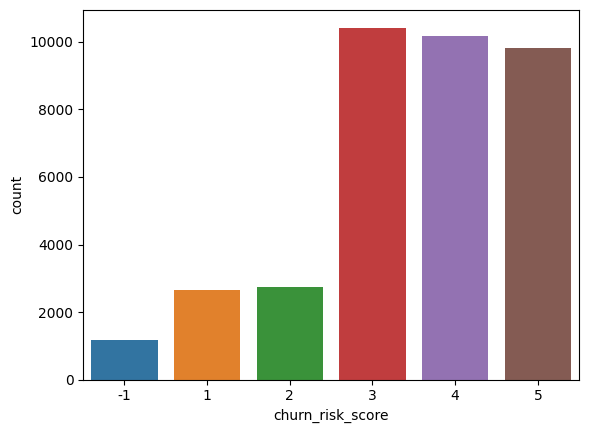

In [ ]:
sns.countplot(x='churn_risk_score', data=df)

<Axes: xlabel='points_in_wallet', ylabel='Count'>

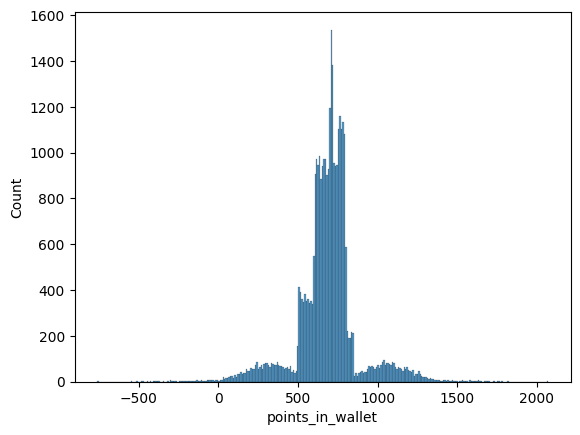

In [ ]:
sns.histplot(data=df, x='points_in_wallet')

In [ ]:
import math
def draw_countplot(df, cols, n_rows, figsize):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False) 
  for i, col in enumerate(cols):
    sns.countplot(data=df, y=col, ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])

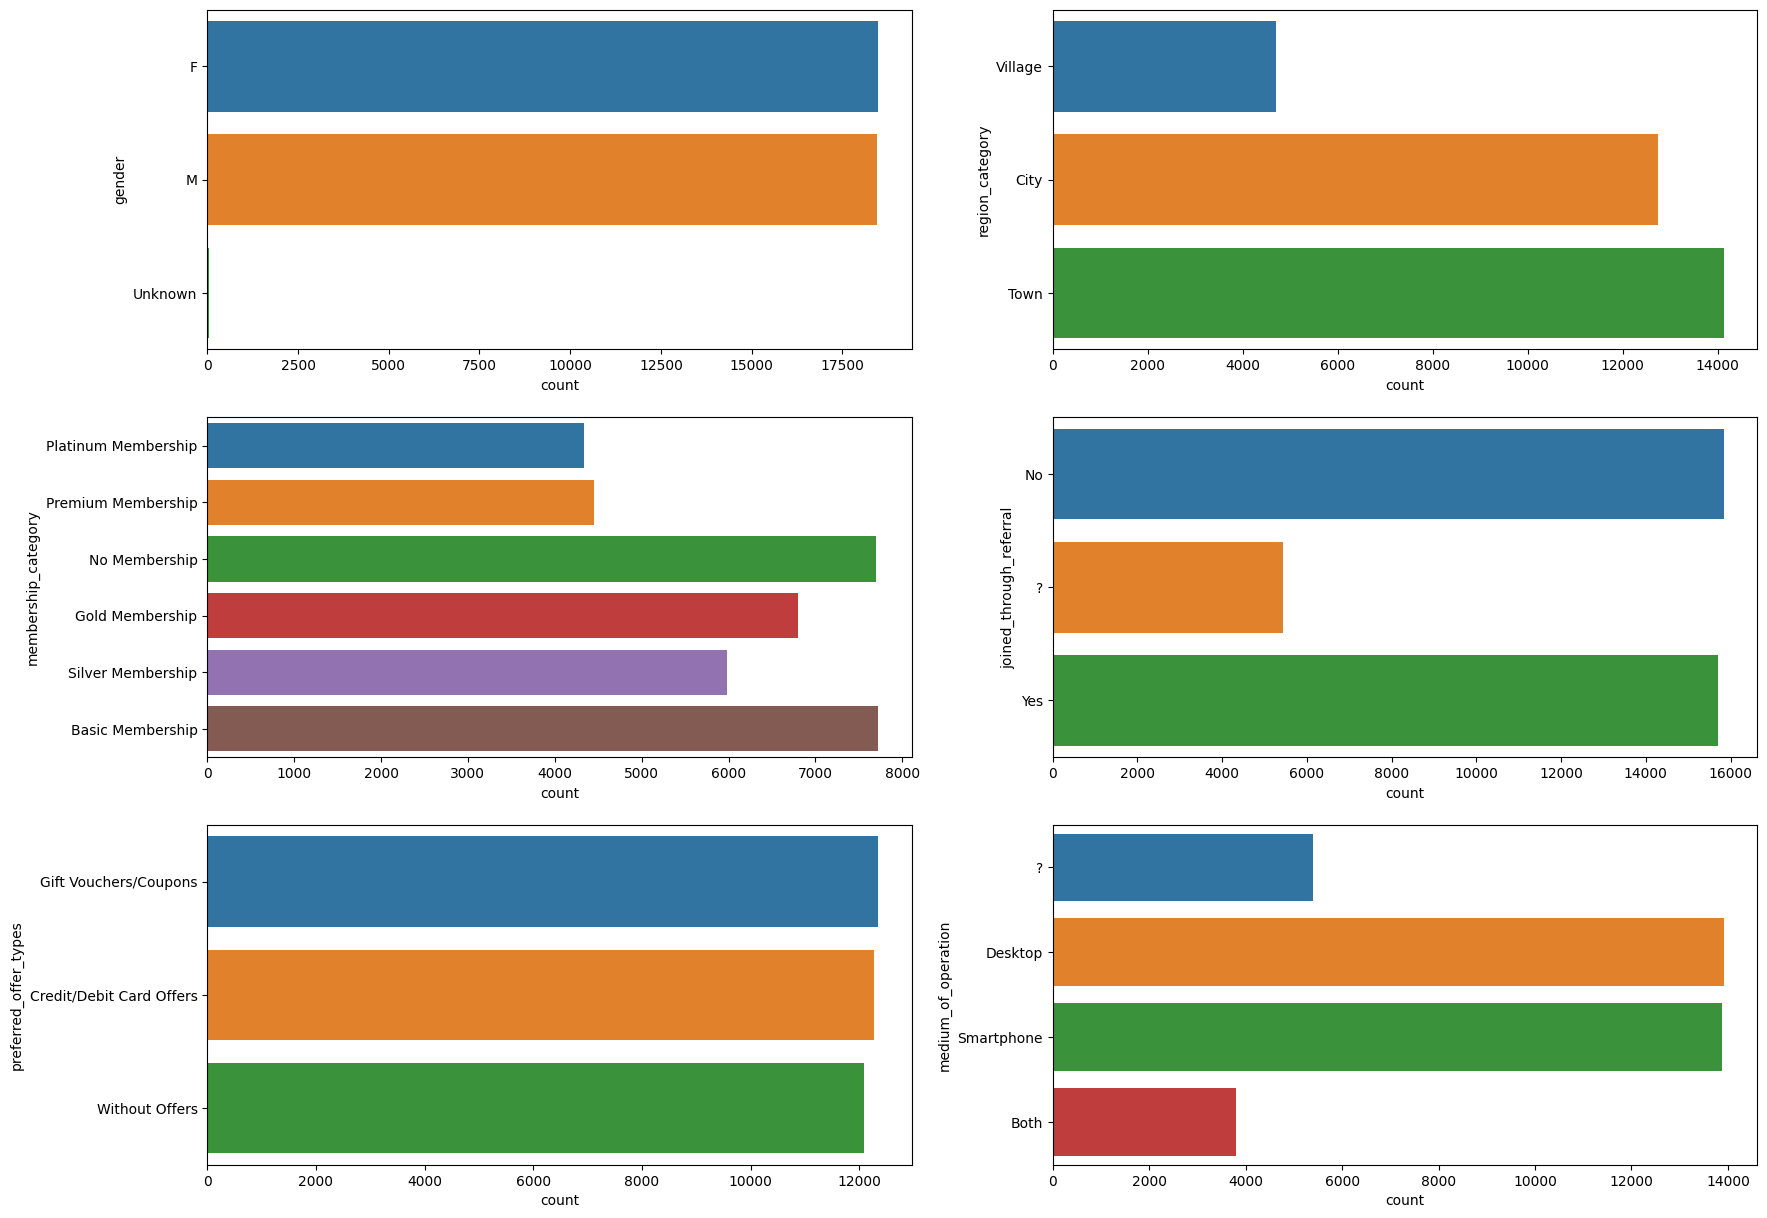

In [ ]:
draw_countplot(df, categorical_features[:6], 3, (20,15)) 
#gender, joined_through_referral, medium_of_operation cần được xử lý

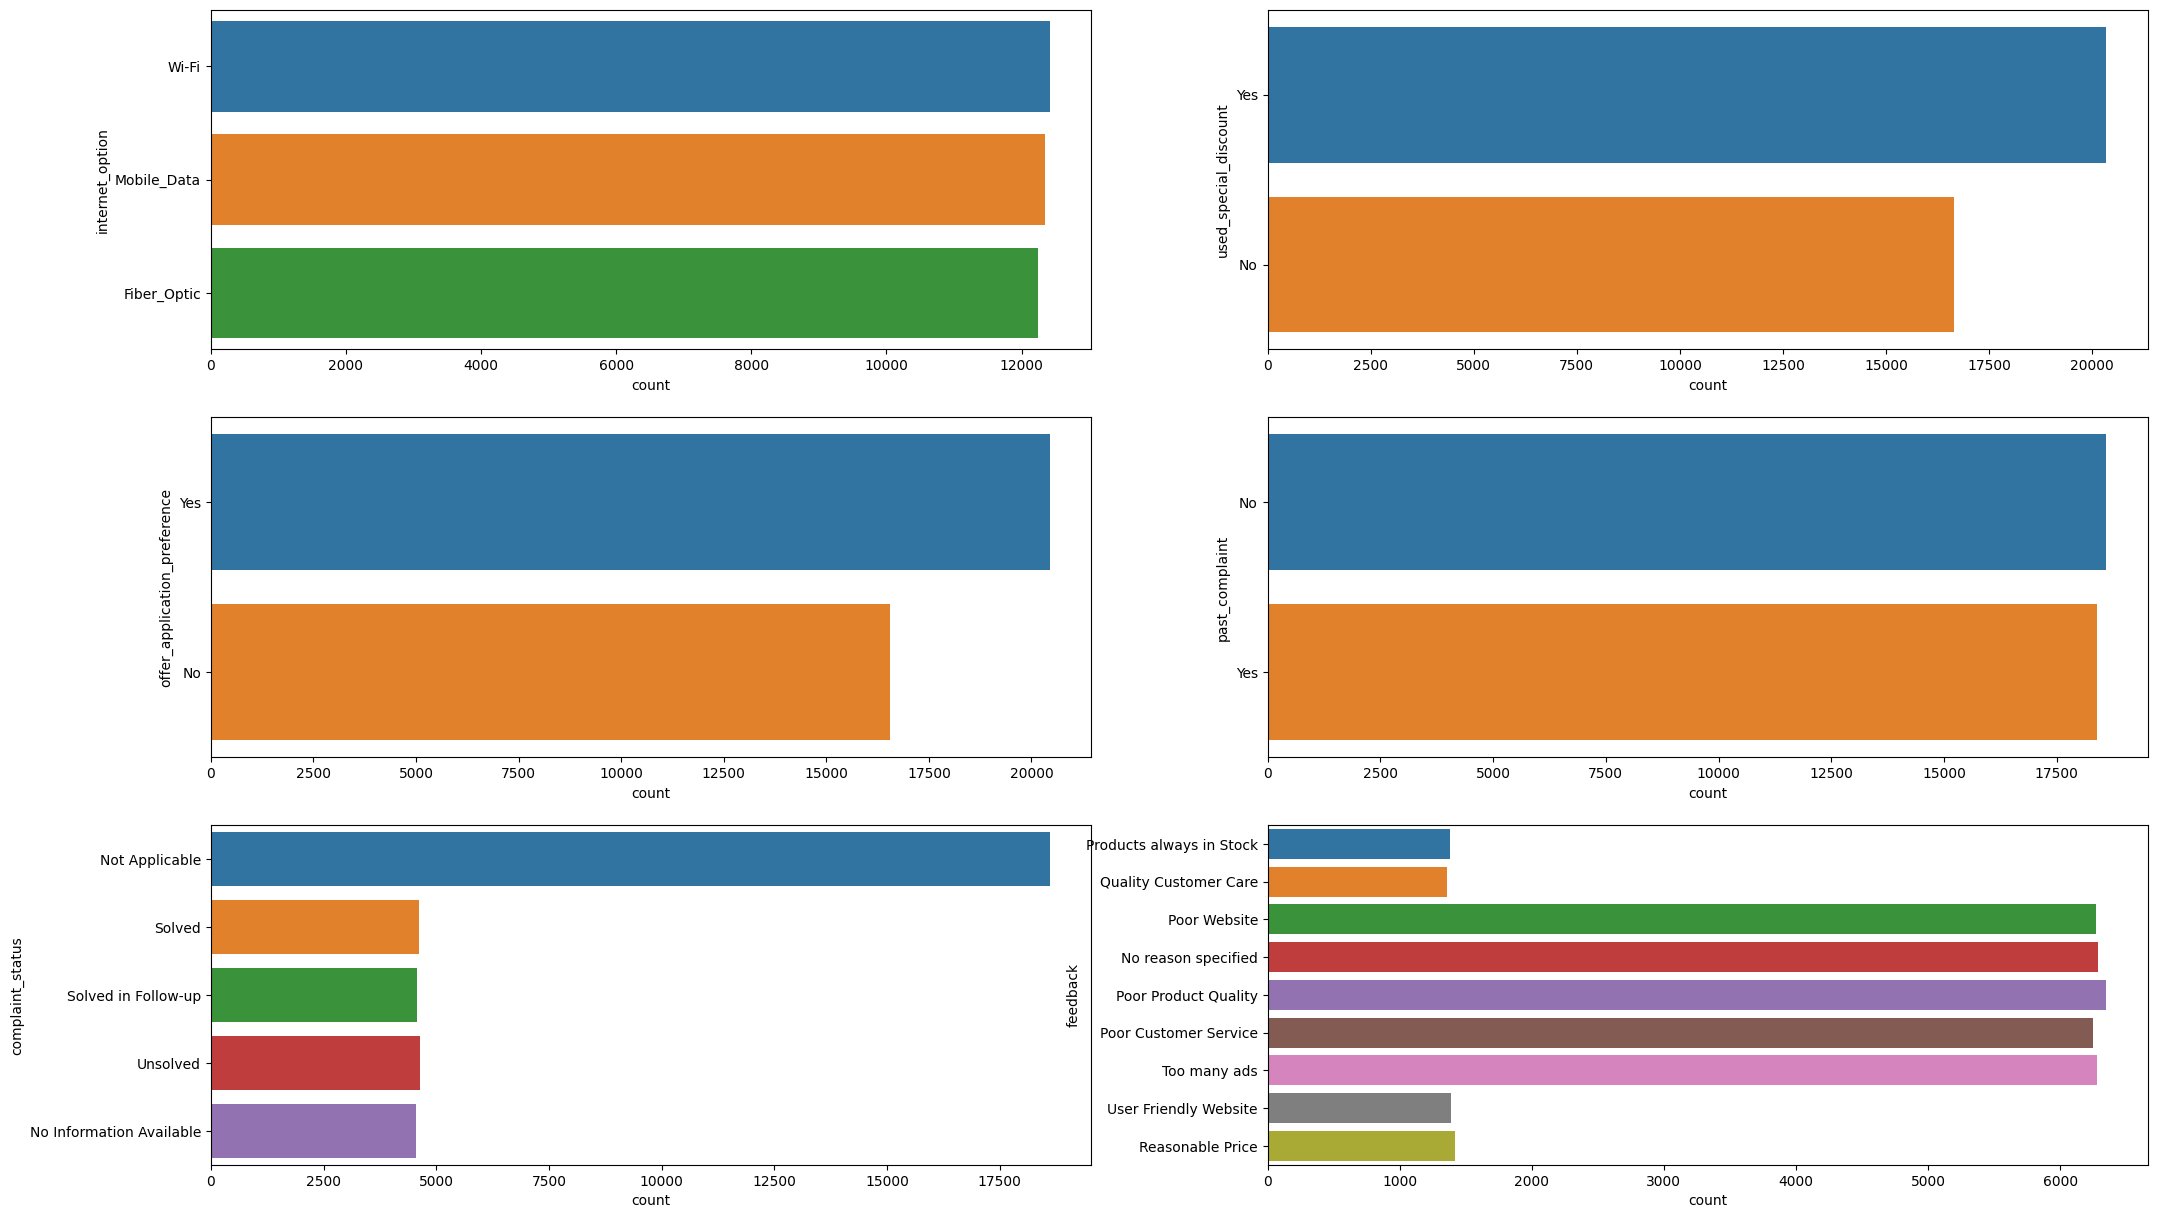

In [ ]:
draw_countplot(df, categorical_features[6:], 3, (25,15)) 

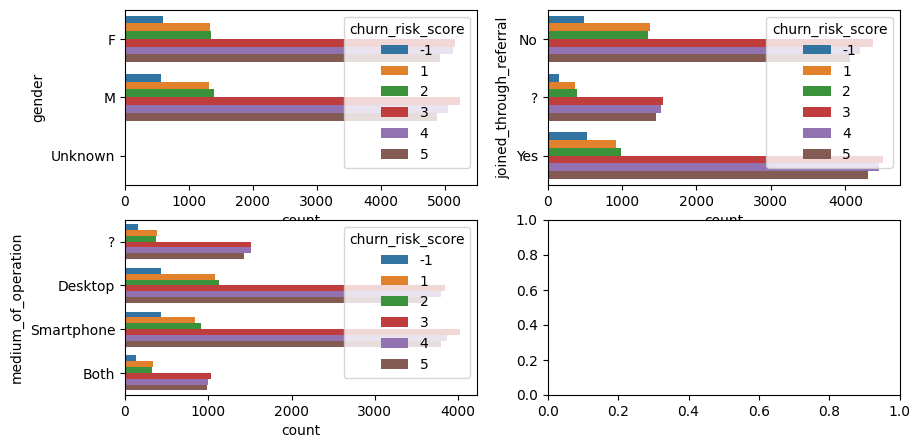

In [ ]:
problem_cols = ['gender', 'joined_through_referral', 'medium_of_operation']
def draw_countplot(df, cols, n_rows, figsize):
  n_cols = math.ceil(len(cols)/n_rows)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=False, sharey=False) 
  for i, col in enumerate(cols):
    sns.countplot(data=df, y=col,hue='churn_risk_score', ax=axes[i//(math.ceil(len(cols)/n_rows)), i%n_cols])
draw_countplot(df, problem_cols, 2, (10, 5)) 

## Preprocessing

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
PATH = "/content/HomeWork-churn_rate_prediction.csv" 
df = pd.read_csv(PATH)

In [ ]:
def preprocessing_data(df):
    imputer = SimpleImputer(strategy='most_frequent')
    df['region_category'] = imputer.fit_transform(df['region_category'].values.reshape(-1,1))
    df['points_in_wallet'] = imputer.fit_transform(df['points_in_wallet'].values.reshape(-1,1))
    df['preferred_offer_types'] = imputer.fit_transform(df['preferred_offer_types'].values.reshape(-1,1))

    problem_cols = ['gender','joined_through_referral', 'medium_of_operation']
    for col in problem_cols:
      df.drop(df[(df[col] == 'Unknown') | (df[col] == '?')].index, axis=0, inplace = True)

    #cols = ['days_since_last_login', 'points_in_wallet', 'avg_time_spent']
    #for col in cols:
      #df.drop(df[df[col] < 0].index, axis=0, inplace=True)

    df.drop(df[df['churn_risk_score']==-1].index, axis=0, inplace=True) #loại bỏ dữ liệu có churn_risk_score  = -1 
    
    df.drop(non_categorical_features, axis=1, inplace=True) 
    df.dropna(inplace=True)
    return df

In [ ]:
df = preprocessing_data(df.copy())
df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,21027.00,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,25239.56,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,24483.66,663.060000,No,Yes,Yes,Solved,Poor Website,5
6,21,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,10,55.380000,8982.50,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,3
8,44,M,Village,Silver Membership,No,Without Offers,Smartphone,Fiber_Optic,15,191.070000,18362.31,705.070000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Town,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,27277.68,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,-638.123421,11069.71,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,23,F,Town,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.940000,38127.56,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,2378.86,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [ ]:
object_cols = [col for col in categorical_features if df[col].dtype=='O']
for col in object_cols:
  print(col, '\t', df[col].unique())

gender 	 ['F' 'M']
region_category 	 ['Town' 'City' 'Village']
membership_category 	 ['No Membership' 'Gold Membership' 'Silver Membership' 'Basic Membership'
 'Premium Membership' 'Platinum Membership']
joined_through_referral 	 ['Yes' 'No']
preferred_offer_types 	 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']
medium_of_operation 	 ['Desktop' 'Smartphone' 'Both']
internet_option 	 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount 	 ['No' 'Yes']
offer_application_preference 	 ['Yes' 'No']
past_complaint 	 ['Yes' 'No']
complaint_status 	 ['Solved in Follow-up' 'Unsolved' 'Solved' 'Not Applicable'
 'No Information Available']
feedback 	 ['Poor Website' 'No reason specified' 'Poor Customer Service'
 'Poor Product Quality' 'Too many ads' 'User Friendly Website'
 'Quality Customer Care' 'Products always in Stock' 'Reasonable Price']


## Feature Engineering

<Axes: >

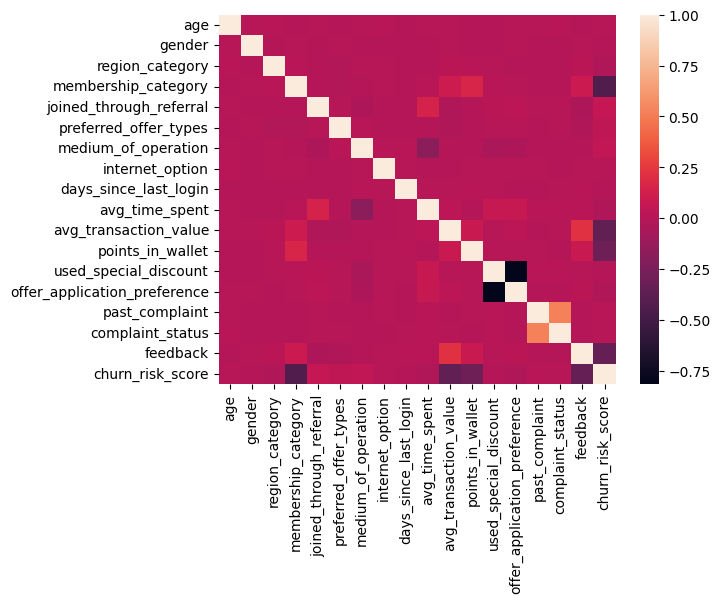

In [ ]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    object_cols = [col for col in df.columns if df[col].dtype=='O']
    for col in object_cols:
      df[col] = df[col].astype("category").cat.codes
    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [ ]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,500.69,0,1,1,3,3,5
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,567.66,0,1,1,4,3,5
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,663.06,0,1,1,2,3,5
6,21,1,1,1,1,1,1,1,10,55.38,8982.50,756.21,1,0,1,3,0,3
8,44,1,2,5,0,2,2,0,15,191.07,18362.31,705.07,1,0,1,3,1,3


In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('churn_risk_score', axis=1)# Todo: Select features
    y = df['churn_risk_score']# Todo: Select label
    return X, y

X, y = prepare_X_y(df)

In [ ]:
print(X.info())
print(y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26050 entries, 2 to 36991
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           26050 non-null  int64  
 1   gender                        26050 non-null  int8   
 2   region_category               26050 non-null  int8   
 3   membership_category           26050 non-null  int8   
 4   joined_through_referral       26050 non-null  int8   
 5   preferred_offer_types         26050 non-null  int8   
 6   medium_of_operation           26050 non-null  int8   
 7   internet_option               26050 non-null  int8   
 8   days_since_last_login         26050 non-null  int64  
 9   avg_time_spent                26050 non-null  float64
 10  avg_transaction_value         26050 non-null  float64
 11  points_in_wallet              26050 non-null  float64
 12  used_special_discount         26050 non-null  int8   
 13  o

# Apply machine learning model

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2023
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(trainX, trainY)

In [ ]:
y_train_oversampling.value_counts()

4    5301
3    5301
5    5301
1    5301
2    5301
Name: churn_risk_score, dtype: int64

## Build SK-learn model

###Decision Tree + Random Forest

Decision Tree

In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def build_decision_tree_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    tree = DecisionTreeClassifier()
    # Todo: Input your scaler and logistic model into pipeline
    model = Pipeline(steps=[
        ('tree', tree)
    ])
    # Todo: fit your model with X, y

    param_grids = {
        'tree__criterion': ['gini', 'entropy', 'log_loss'],
        'tree__max_depth': [4,5,6,10,15,20] 
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(model, param_grids, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    return grid

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    #print("precision", precision_score(y_true, y_pred))
    #print("recall", recall_score(y_true, y_pred))
    #print("accuracy", accuracy_score(y_true, y_pred))
    #print("F1", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = precision_score(y_true, y_pred, average='micro')
    return main_score

model = build_decision_tree_model(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY, pred)

Best parameter (CV score=0.775):
{'tree__criterion': 'gini', 'tree__max_depth': 10}
[5 3 3 ... 3 2 3]
              precision    recall  f1-score   support

           1       0.69      0.81      0.74       591
           2       0.78      0.64      0.70       614
           3       0.90      0.92      0.91      2294
           4       0.75      0.54      0.63      2203
           5       0.70      0.90      0.79      2113

    accuracy                           0.78      7815
   macro avg       0.77      0.76      0.75      7815
weighted avg       0.78      0.78      0.77      7815



0.7758157389635316

In [ ]:
#Sử dụng upsampling data
model = build_decision_tree_model(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY, pred)

Best parameter (CV score=0.766):
{'tree__criterion': 'log_loss', 'tree__max_depth': 15}
[4 3 3 ... 3 2 3]
              precision    recall  f1-score   support

           1       0.67      0.68      0.67       591
           2       0.65      0.72      0.69       614
           3       0.90      0.89      0.89      2294
           4       0.68      0.61      0.64      2203
           5       0.72      0.79      0.76      2113

    accuracy                           0.75      7815
   macro avg       0.72      0.74      0.73      7815
weighted avg       0.75      0.75      0.75      7815



0.7534229046705054

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def build_random_forest_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    forest = RandomForestClassifier(n_jobs=-1)
    # Todo: Input your scaler and logistic model into pipeline
    model = Pipeline(steps=[
        ('forest', forest)
    ])
    # Todo: fit your model with X, y

    param_grids = {
        'forest__n_estimators': [100, 150, 200],
        'forest__criterion': ['gini', 'entropy', 'log_loss'],
        'forest__max_depth': [6,10,15]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(model, param_grids, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    return grid

model = build_random_forest_model(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY, pred)

Best parameter (CV score=0.771):
{'forest__criterion': 'entropy', 'forest__max_depth': 15, 'forest__n_estimators': 200}
[5 3 3 ... 3 2 3]
              precision    recall  f1-score   support

           1       0.73      0.72      0.73       591
           2       0.74      0.74      0.74       614
           3       0.88      0.93      0.91      2294
           4       0.73      0.57      0.64      2203
           5       0.73      0.85      0.78      2113

    accuracy                           0.78      7815
   macro avg       0.76      0.76      0.76      7815
weighted avg       0.77      0.78      0.77      7815



0.7763275751759438

In [ ]:
#sử dụng upsampling data
model = build_random_forest_model(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY, pred)

Best parameter (CV score=0.800):
{'forest__criterion': 'entropy', 'forest__max_depth': 15, 'forest__n_estimators': 200}
[5 3 3 ... 3 2 3]
              precision    recall  f1-score   support

           1       0.72      0.70      0.71       591
           2       0.71      0.76      0.73       614
           3       0.89      0.90      0.90      2294
           4       0.71      0.58      0.64      2203
           5       0.72      0.85      0.78      2113

    accuracy                           0.77      7815
   macro avg       0.75      0.76      0.75      7815
weighted avg       0.77      0.77      0.77      7815



0.7696737044145874

###XGBoost + CatBoost


In [ ]:
!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


XGBoost

In [ ]:
import xgboost as xgb
def build_xgboost_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    model = xgb.XGBClassifier()
    # Todo: Input your scaler and logistic model into pipeline
    model = Pipeline(steps=[
        ('xgb', model)
    ])
    # Todo: fit your model with X, y

    param_grids = {
        'xgb__n_estimators': [150, 200],
        'xgb__max_depth': [10, 15, 20]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(model, param_grids, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    return grid

model = build_xgboost_model(trainX, trainY-1)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY-1, pred)

Best parameter (CV score=0.779):
{'xgb__max_depth': 15, 'xgb__n_estimators': 150}
[4 2 2 ... 2 1 2]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       591
           1       0.77      0.70      0.73       614
           2       0.90      0.91      0.91      2294
           3       0.68      0.61      0.65      2203
           4       0.73      0.80      0.76      2113

    accuracy                           0.77      7815
   macro avg       0.76      0.76      0.76      7815
weighted avg       0.77      0.77      0.77      7815



0.7704414587332054

In [ ]:
#sử dụng upsampling data
model = build_xgboost_model(X_train_oversampling, y_train_oversampling-1)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY-1, pred)

Best parameter (CV score=0.828):
{'xgb__max_depth': 10, 'xgb__n_estimators': 200}
[4 2 2 ... 2 1 2]
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       591
           1       0.72      0.75      0.74       614
           2       0.90      0.91      0.91      2294
           3       0.68      0.61      0.64      2203
           4       0.72      0.79      0.76      2113

    accuracy                           0.76      7815
   macro avg       0.75      0.75      0.75      7815
weighted avg       0.76      0.76      0.76      7815



0.7645553422904671

CatBoost

In [ ]:
from catboost import CatBoostClassifier
def build_catboost_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    model = CatBoostClassifier()
    model = Pipeline(steps=[
        ('cb', model)
    ])
    param_grids = {
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(model, param_grids, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    return grid

model = build_catboost_model(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
pred = model.predict(testX)
calculate_performance(testY, pred)

Learning rate set to 0.091755
0:	learn: 1.4350165	total: 21.4ms	remaining: 21.4s
1:	learn: 1.3159804	total: 43.5ms	remaining: 21.7s
2:	learn: 1.2167152	total: 73.7ms	remaining: 24.5s
3:	learn: 1.1305409	total: 93.1ms	remaining: 23.2s
4:	learn: 1.0664471	total: 110ms	remaining: 21.9s
5:	learn: 1.0142121	total: 125ms	remaining: 20.7s
6:	learn: 0.9677568	total: 140ms	remaining: 19.8s
7:	learn: 0.9204458	total: 156ms	remaining: 19.3s
8:	learn: 0.8733026	total: 174ms	remaining: 19.2s
9:	learn: 0.8329314	total: 189ms	remaining: 18.8s
10:	learn: 0.8044678	total: 209ms	remaining: 18.8s
11:	learn: 0.7695560	total: 225ms	remaining: 18.5s
12:	learn: 0.7420963	total: 241ms	remaining: 18.3s
13:	learn: 0.7227198	total: 256ms	remaining: 18s
14:	learn: 0.6964963	total: 272ms	remaining: 17.8s
15:	learn: 0.6727546	total: 287ms	remaining: 17.6s
16:	learn: 0.6526089	total: 302ms	remaining: 17.5s
17:	learn: 0.6332608	total: 319ms	remaining: 17.4s
18:	learn: 0.6176884	total: 334ms	remaining: 17.3s
19:	learn

0.7797824696097249

In [ ]:
#Sử dụng Upsampling data
model = build_catboost_model(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
pred = model.predict(testX)
calculate_performance(testY, pred)

Learning rate set to 0.093522
0:	learn: 1.4481587	total: 38.9ms	remaining: 38.9s
1:	learn: 1.3286359	total: 71.6ms	remaining: 35.7s
2:	learn: 1.2371719	total: 112ms	remaining: 37.4s
3:	learn: 1.1606940	total: 163ms	remaining: 40.5s
4:	learn: 1.0946496	total: 219ms	remaining: 43.6s
5:	learn: 1.0390477	total: 277ms	remaining: 45.8s
6:	learn: 0.9898910	total: 332ms	remaining: 47.1s
7:	learn: 0.9443308	total: 388ms	remaining: 48.1s
8:	learn: 0.9040238	total: 447ms	remaining: 49.2s
9:	learn: 0.8715267	total: 493ms	remaining: 48.8s
10:	learn: 0.8406120	total: 545ms	remaining: 49s
11:	learn: 0.8142493	total: 604ms	remaining: 49.7s
12:	learn: 0.7917960	total: 653ms	remaining: 49.5s
13:	learn: 0.7694208	total: 709ms	remaining: 49.9s
14:	learn: 0.7482361	total: 768ms	remaining: 50.5s
15:	learn: 0.7304701	total: 820ms	remaining: 50.4s
16:	learn: 0.7127953	total: 870ms	remaining: 50.3s
17:	learn: 0.6958643	total: 924ms	remaining: 50.4s
18:	learn: 0.6813816	total: 975ms	remaining: 50.3s
19:	learn: 

0.7744081893793986

Main Model

In [ ]:
main_model = build_catboost_model(X, y)

Learning rate set to 0.093439
0:	learn: 1.4338045	total: 94.3ms	remaining: 1m 34s
1:	learn: 1.3096872	total: 156ms	remaining: 1m 17s
2:	learn: 1.2164959	total: 220ms	remaining: 1m 13s
3:	learn: 1.1395106	total: 281ms	remaining: 1m 9s
4:	learn: 1.0636408	total: 344ms	remaining: 1m 8s
5:	learn: 0.9997747	total: 402ms	remaining: 1m 6s
6:	learn: 0.9447103	total: 465ms	remaining: 1m 5s
7:	learn: 0.8947324	total: 525ms	remaining: 1m 5s
8:	learn: 0.8518166	total: 577ms	remaining: 1m 3s
9:	learn: 0.8120218	total: 630ms	remaining: 1m 2s
10:	learn: 0.7831726	total: 684ms	remaining: 1m 1s
11:	learn: 0.7529773	total: 734ms	remaining: 1m
12:	learn: 0.7265124	total: 775ms	remaining: 58.8s
13:	learn: 0.7037807	total: 801ms	remaining: 56.4s
14:	learn: 0.6795712	total: 826ms	remaining: 54.2s
15:	learn: 0.6584583	total: 853ms	remaining: 52.5s
16:	learn: 0.6398373	total: 892ms	remaining: 51.6s
17:	learn: 0.6207277	total: 928ms	remaining: 50.6s
18:	learn: 0.6054068	total: 981ms	remaining: 50.7s
19:	learn:

Conclusion

In [ ]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. Metric chính là precision vì trong bài toán này ta muốn tỉ lệ false positive của từng class càng thấp càng tốt để có được những dự đoán có độ chính xác cao nhất cho từng class-----" \
           "Other conclusion: Model chính trong bài này CatBoost, vì cả precision lẫn CV-score đều cao. Ngoài ra CatBoost được huấn luyện nhanh hơn hẳn so với XGBoost và RandomForest do có bộ tham số default đã rất tốt. Tham số của model là bộ tham số default."

get_conclusion()

'7. Metric chính là precision vì trong bài toán này ta muốn tỉ lệ false positive của từng class càng thấp càng tốt để có được những dự đoán có độ chính xác cao nhất cho từng class-----Other conclusion: Model chính trong bài này CatBoost, vì cả precision lẫn CV-score đều cao. Ngoài ra CatBoost được huấn luyện nhanh hơn hẳn so với XGBoost và RandomForest do có bộ tham số default đã rất tốt. Tham số của model là bộ tham số default.'